# IFT870 Project - TEDflix

Maxime Lafont--Trevisan (lafm2724)  
Gaëtan Lounes (loug2904)  
Victor Taillieu (taiv2701)  
Luca Vaio (vail3202)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from ast import literal_eval

In [2]:
save = False

if save:
    sns.set(font_scale=1.8)


In [3]:
ted_talks = pd.read_csv("../data/ted_talks_selected.csv")
ted_talks

,talk_id,title,speaker_1,occupations,about_speakers,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,2,Simple designs to save a life,Amy Smith,"{0: ['inventor', 'engineer']}","{0: 'Amy Smith designs cheap, practical fixes ...",1724438,2006-02-24,2006-08-15,TED2006,"['ar', 'bg', 'ca', 'de', 'el', 'en', 'es', 'fa...",101.0,906,"['MacArthur grant', 'alternative energy', 'des...","{1561: 'Energy from floating algae pods', 1072...",Fumes from indoor cooking fires kill more than...,"In terms of invention, I'd like to tell you th..."
2,3,How to rebuild a broken state,Ashraf Ghani,{0: ['president-elect of afghanistan']},"{0: 'Ashraf Ghani, Afghanistan’s new president...",981920,2005-07-12,2006-10-18,TEDGlobal 2005,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",75.0,1125,"['business', 'corruption', 'culture', 'economi...","{127: 'Want to help Africa? Do business here',...",Ashraf Ghani's passionate and powerful 10-minu...,"A public, Dewey long ago observed, is constitu..."
3,4,The real future of space exploration,Burt Rutan,{0: ['aircraft engineer']},"{0: ""In 2004, legendary spacecraft designer Bu...",2427994,2006-02-24,2006-10-25,TED2006,"['ar', 'az', 'bg', 'cs', 'de', 'el', 'en', 'es...",196.0,1177,"['NASA', 'aircraft', 'business', 'design', 'en...","{141: ""Inside the world's deepest caves"", 264:...","In this passionate talk, legendary spacecraft ...","I want to start off by saying, Houston, we hav..."
4,5,Great cars are great art,Chris Bangle,{0: ['car designer']},{0: 'Car design is a ubiquitous but often over...,978483,2002-02-02,2007-04-05,TED2002,"['ar', 'bg', 'de', 'en', 'es', 'fr', 'he', 'hr...",81.0,1204,"['business', 'cars', 'design', 'industrial des...","{4: 'The real future of space exploration', 26...",American designer Chris Bangle explains his ph...,"What I want to talk about is, as background, i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,62707,The wildly complex anatomy of a sneaker,Angel Chang,NaN,{0: 'Angel Chang is a womenswear designer work...,219171,2020-04-23,2020-04-23,TED-Ed,"['el', 'en', 'es', 'fr', 'ko', 'pt', 'pt-br']",NaN,303,"['TED-Ed', 'education', 'animation', 'fashion'...",{2756: 'What really happens to the plastic you...,"Australians call them ""runners."" The British k...","Australians call them “runners."" The British k..."
3953,62748,A global pandemic calls for global solutions,Larry Brilliant,"{0: ['epidemiologist', 'philanthropist'], 1: [...","{0: ""TED Prize winner Larry Brilliant has spen...",760969,2020-04-22,2020-04-24,TED2020: The Prequel,"['en', 'es', 'it', 'pt-br']",37.0,941,"['coronavirus', 'pandemic', 'epidemiology', 'v...","{58: 'My wish: Help me stop pandemics', 61303:...",Examining the facts and figures of the coronav...,"Helen Walters: So, Chris, who's up first? Chri..."
3954,62782,The dark history of IQ tests,Stefan C Dombrowski,NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
3955,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."


In [4]:
ted_talks.describe()

,talk_id,views,comments,duration
count,3957.000000,3.957000e+03,3318.000000,3957.000000
mean,12427.062168,2.163597e+06,162.789030,723.203690
std,17464.917841,3.467708e+06,269.894466,363.100135
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1242.000000,8.922300e+05,38.000000,389.000000
50%,2323.000000,1.383808e+06,89.000000,735.000000
75%,23785.000000,2.147410e+06,189.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


# Les plus vus

In [5]:
most_viewed = ted_talks[["title", "views"]].sort_values(by='views', ascending=False).head(10).reset_index(drop=True)
most_viewed

,title,views
0,Do schools kill creativity?,65051954
1,Your body language may shape who you are,57074270
2,This is what happens when you reply to spam email,56932551
3,How great leaders inspire action,49730580
4,The power of vulnerability,47544833
5,How to speak so that people want to listen,41504331
6,Inside the mind of a master procrastinator,37976820
7,"Looks aren't everything. Believe me, I'm a model.",33874546
8,My philosophy for a happy life,33691484
9,The next outbreak? We're not ready,33521780


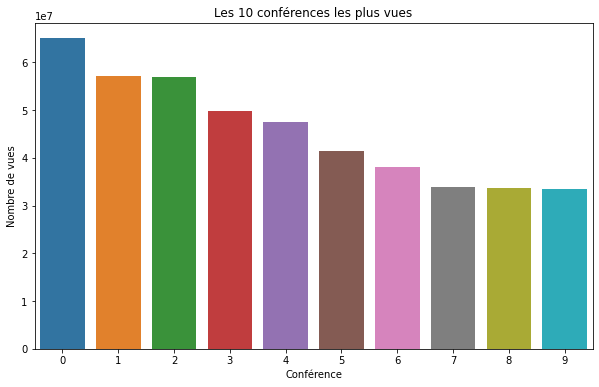

In [6]:
plt.figure(figsize=(10, 6))

sns.barplot(x=list(range(10)), y=most_viewed.views)
plt.title("Les 10 conférences les plus vues")
plt.xlabel("Conférence")
plt.ylabel("Nombre de vues")
if save: plt.savefig("../data/graphs/most_viewed.png")
plt.show()

# Durées

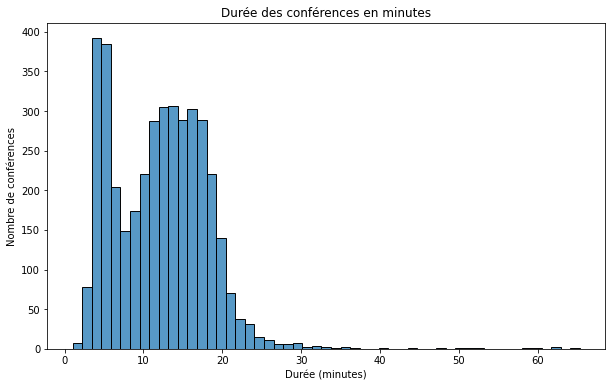

In [7]:
plt.figure(figsize=(10, 6))

sns.histplot(ted_talks.duration / 60)
plt.title("Durée des conférences en minutes")
plt.xlabel("Durée (minutes)")
plt.ylabel("Nombre de conférences")
if save: plt.savefig("../data/graphs/duration.png")
plt.show()

# Corrélations

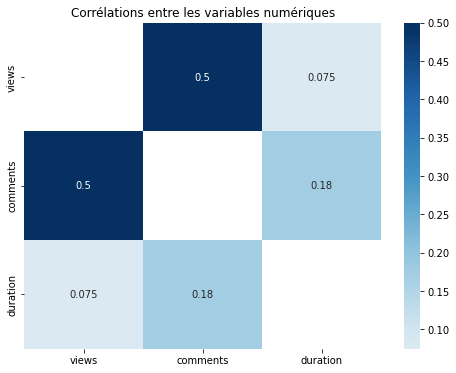

In [8]:
plt.figure(figsize=(8, 6))

sns.heatmap(ted_talks.drop("talk_id", axis=1).corr(), mask=np.eye(3), annot=True, cmap="RdBu", center=0)
plt.title("Corrélations entre les variables numériques")
if save: plt.savefig("../data/graphs/correlations.png")
plt.show()

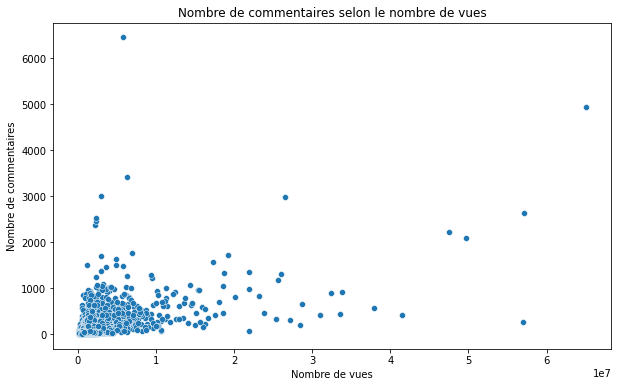

In [9]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=ted_talks.views, y=ted_talks.comments)
plt.title("Nombre de commentaires selon le nombre de vues")
plt.xlabel("Nombre de vues")
plt.ylabel("Nombre de commentaires")
if save: plt.savefig("../data/graphs/comments_views.png")
plt.show()

# Thèmes à débat

In [10]:
ted_talks["comment_rate"] = ted_talks.comments / ted_talks.views * 1e6

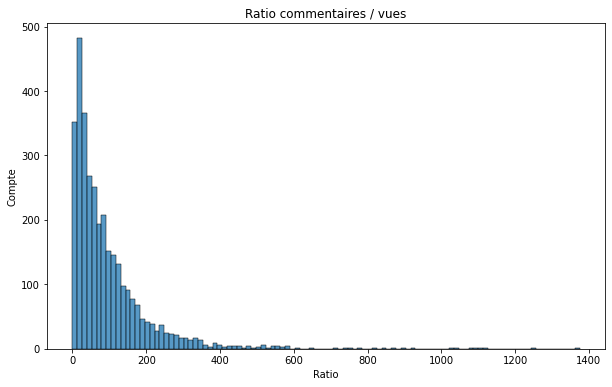

In [11]:
plt.figure(figsize=(10, 6))

sns.histplot(ted_talks["comment_rate"])
plt.title("Ratio commentaires / vues")
plt.xlabel("Ratio")
plt.ylabel("Compte")
if save: plt.savefig("../data/graphs/comment_rate.png")
plt.show()

In [12]:
most_commented_topics = ted_talks.sort_values(by="comment_rate", ascending=False).topics.head(100)

most_commented_topics = most_commented_topics.apply(lambda x: literal_eval(x)).explode().value_counts()

most_commented_topics = most_commented_topics[most_commented_topics > 10]

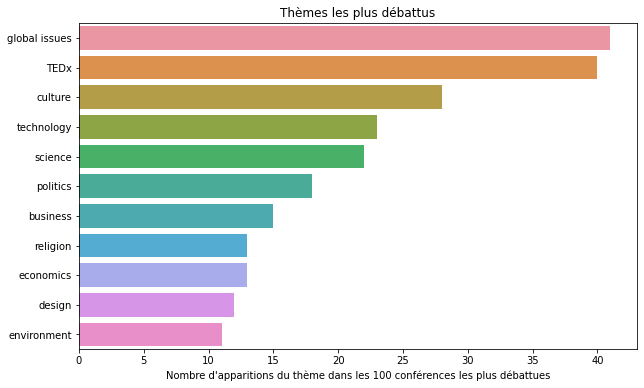

In [13]:
plt.figure(figsize=(10, 6))

sns.barplot(x=most_commented_topics, y=most_commented_topics.index)
plt.title("Thèmes les plus débattus")
plt.xlabel("Nombre d'apparitions du thème dans les 100 conférences les plus débattues")
if save: plt.savefig("../data/graphs/debated_topics.png")
plt.show()

# Thèmes les plus vus

In [14]:
most_viewed_topics = ted_talks.sort_values(by="views", ascending=False).topics.head(100)

most_viewed_topics = most_viewed_topics.apply(lambda x: literal_eval(x)).explode().value_counts()

most_viewed_topics = most_viewed_topics[most_viewed_topics > 10]

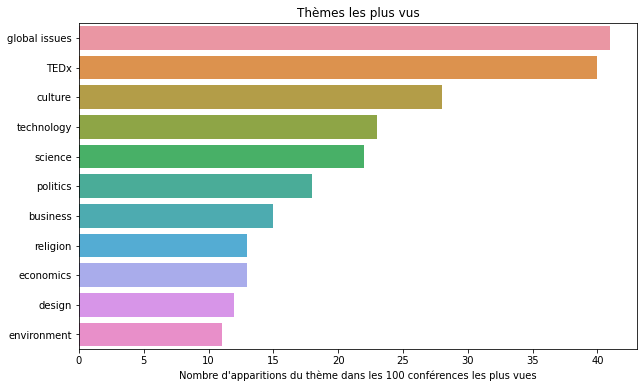

In [15]:
plt.figure(figsize=(10, 6))

sns.barplot(x=most_commented_topics, y=most_commented_topics.index)
plt.title("Thèmes les plus vus")
plt.xlabel("Nombre d'apparitions du thème dans les 100 conférences les plus vues")
if save: plt.savefig("../data/graphs/viewed_topics.png")
plt.show()

# Orateurs

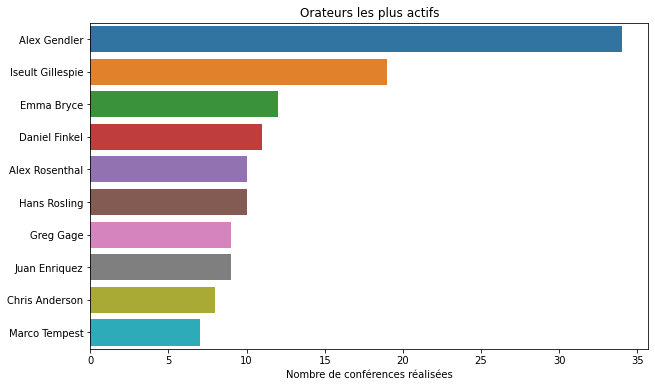

In [16]:
plt.figure(figsize=(10, 6))

frequent_speakers = ted_talks.speaker_1.value_counts().head(10)

sns.barplot(x=frequent_speakers, y=frequent_speakers.index)
plt.title("Orateurs les plus actifs")
plt.xlabel("Nombre de conférences réalisées")
if save: plt.savefig("../data/graphs/speakers.png")
plt.show()

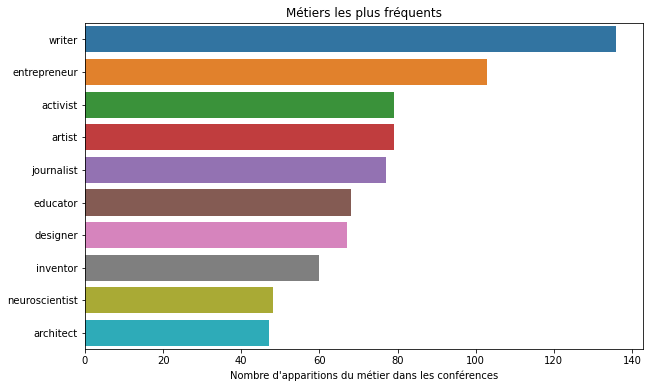

In [17]:
most_common_occupations = ted_talks.occupations.apply(lambda x: literal_eval(x)[0] if pd.notna(x) else x).explode().value_counts()[1:].head(10)

plt.figure(figsize=(10, 6))

sns.barplot(x=most_common_occupations, y=most_common_occupations.index)
plt.title("Métiers les plus fréquents")
plt.xlabel("Nombre d'apparitions du métier dans les conférences")
if save: plt.savefig("../data/graphs/frequent_occupations.png")
plt.show()

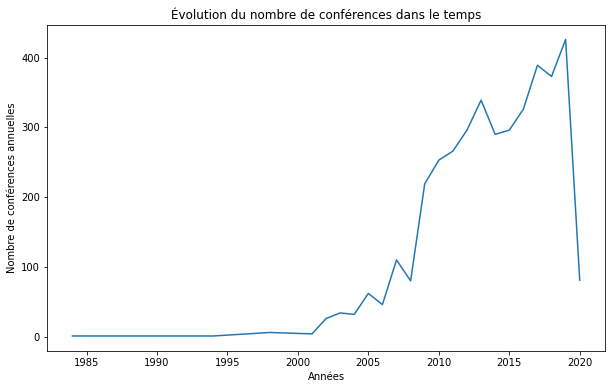

In [18]:
ted_talks.recorded_date = ted_talks.apply(lambda x: x.recorded_date if pd.notnull(x.recorded_date) else x.published_date, axis=1)
ted_talks.recorded_date = pd.to_datetime(ted_talks.recorded_date)

talks_by_year = ted_talks.recorded_date.dt.year.value_counts()
# talks_by_year = talks_by_year[talks_by_year.index < 2020]

plt.figure(figsize=(10, 6))

sns.lineplot(x=talks_by_year.index, y=talks_by_year)
plt.title("Évolution du nombre de conférences dans le temps")
plt.xlabel("Années")
plt.ylabel("Nombre de conférences annuelles")
if save: plt.savefig("../data/graphs/talks_evolution.png")
plt.show()

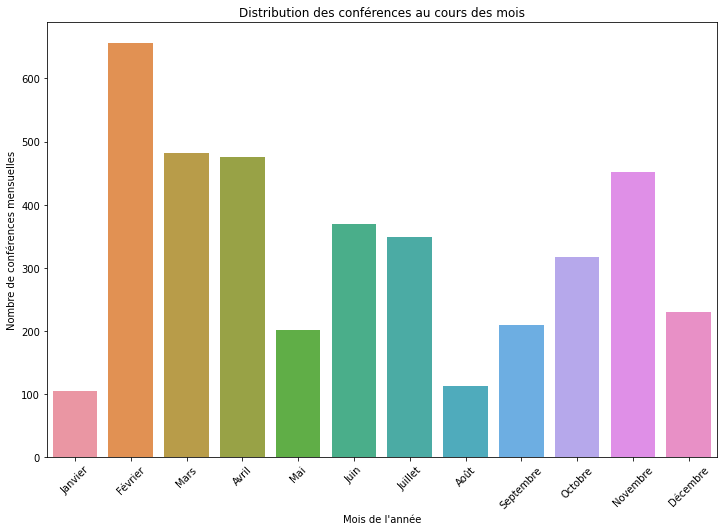

In [19]:
talks_by_month = ted_talks.recorded_date.dt.month.value_counts().sort_index()
months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]

plt.figure(figsize=(12, 8))

sns.barplot(x=months, y=talks_by_month)
plt.xticks(rotation=45)
plt.title("Distribution des conférences au cours des mois")
plt.xlabel("Mois de l'année")
plt.ylabel("Nombre de conférences mensuelles")
if save: plt.savefig("../data/graphs/months_talks.png")
plt.show()

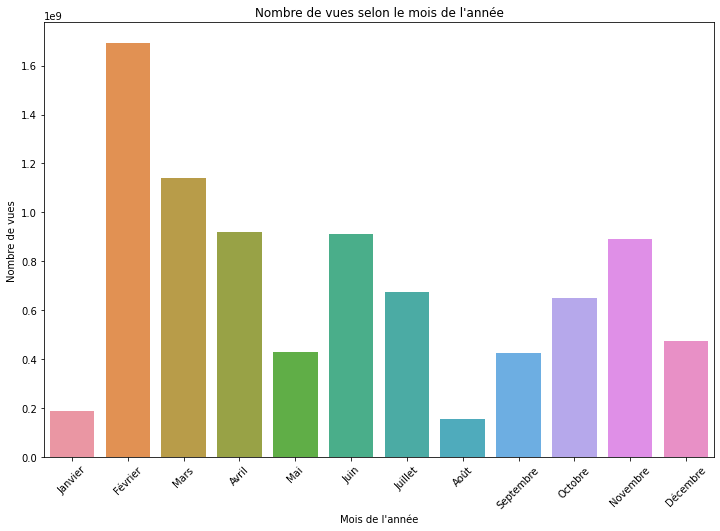

In [20]:
ted_talks["recorded_month"] = ted_talks.recorded_date.dt.month

views_by_months = ted_talks.groupby("recorded_month").sum()["views"]

plt.figure(figsize=(12, 8))

sns.barplot(x=months, y=views_by_months)
plt.xticks(rotation=45)
plt.title("Nombre de vues selon le mois de l'année")
plt.xlabel("Mois de l'année")
plt.ylabel("Nombre de vues")
if save: plt.savefig("../data/graphs/months_views.png")
plt.show()

In [21]:
talks_by_year_month = ted_talks.groupby(pd.Grouper(key="recorded_date", freq="M")).count()["talk_id"]
talks_by_year_month = talks_by_year_month[talks_by_year_month.index.year > 1996]
talks_by_year_month

recorded_date
1997-01-31     0
1997-02-28     0
1997-03-31     0
1997-04-30     0
1997-05-31     0
              ..
2019-12-31    45
2020-01-31    20
2020-02-29    22
2020-03-31    19
2020-04-30    20
Freq: M, Name: talk_id, Length: 280, dtype: int64

In [22]:
years = talks_by_year_month.index.year.unique()

df_year_month = []

for year in years:
    to_append = list(talks_by_year_month[talks_by_year_month.index.year == year])
    if year == 1984:
        to_append = [0] + to_append
    df_year_month.append(to_append)

df_year_month = pd.DataFrame(df_year_month, columns=months)
df_year_month.index = years
df_year_month.fillna(0, inplace=True)

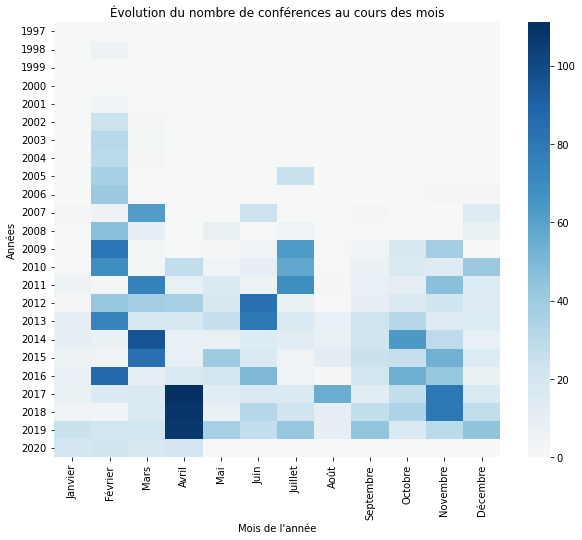

In [23]:
plt.figure(figsize=(10, 8))

sns.heatmap(pd.DataFrame(df_year_month), cmap="RdBu", center=0)
plt.title("Évolution du nombre de conférences au cours des mois")
plt.xlabel("Mois de l'année")
plt.ylabel("Années")
if save: plt.savefig("../data/graphs/year_month_evolution.png")
plt.show()

# Boxplots

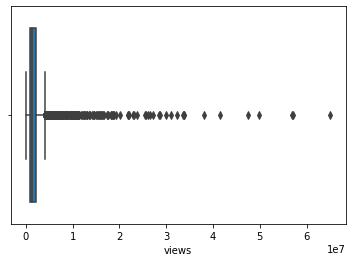

In [24]:
sns.boxplot(x=ted_talks.views)
plt.show()

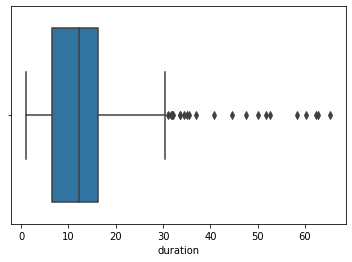

In [25]:
sns.boxplot(x=ted_talks.duration / 60)
plt.show()

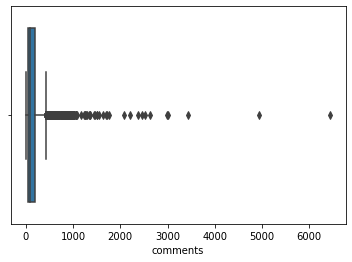

In [26]:
sns.boxplot(x=ted_talks.comments)
plt.show()

# Thèmes

In [27]:
# Source : https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
def boolean_df(item_lists, unique_items):
    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [28]:
def evaluate(x):
    if pd.isna(x):
        return x
    return literal_eval(x)

ted_talks.topics = ted_talks.topics.apply(evaluate)

In [29]:
one_hot_topics = boolean_df(ted_talks.topics, ted_talks.topics.explode().unique())
one_hot_topics["year"] = ted_talks.recorded_date.dt.year
one_hot_topics

,alternative energy,cars,climate change,culture,environment,global issues,science,sustainability,technology,MacArthur grant,...,start-up,gay,inclusion,testing,development,rap,coronavirus,autism,TED Connects,year
0,True,True,True,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,2006
1,True,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,2006
2,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2005
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2006
4,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,False,False,True,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,2020
3953,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,2020
3954,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,2020
3955,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2020


In [30]:
most_talked_ted = ted_talks.topics.explode().value_counts().head(12).index
most_talked = most_talked_ted.drop(["TED-Ed", "TEDx"])
most_talked

Index(['science', 'technology', 'culture', 'global issues', 'society',
       'design', 'social change', 'animation', 'business', 'health'],
      dtype='object')

In [31]:
top_topics_by_year = one_hot_topics.groupby("year").sum()[most_talked]
top_topics_by_year = top_topics_by_year[(top_topics_by_year.index >= 2010) & (top_topics_by_year.index != 2020)]
top_topics_by_year.index = pd.to_datetime(top_topics_by_year.index, format="%Y")
top_topics_by_year

,science,technology,culture,global issues,society,design,social change,animation,business,health
year,,,,,,,,,,
2010-01-01,67,64,65,64,6,44,8,1,49,21
2011-01-01,76,88,76,55,4,54,9,0,25,15
2012-01-01,76,74,55,55,9,33,9,25,33,30
2013-01-01,67,72,56,41,2,33,13,69,34,29
2014-01-01,55,41,25,33,8,17,12,47,22,34
2015-01-01,72,62,20,37,37,36,28,46,15,57
2016-01-01,70,79,23,44,111,37,83,48,38,52
2017-01-01,92,70,30,31,147,34,117,33,36,58
2018-01-01,103,91,43,24,105,34,91,18,30,46


[]

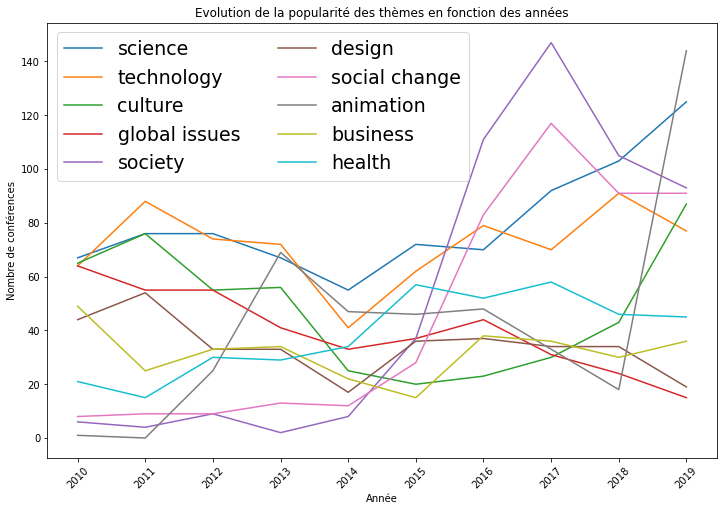

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(top_topics_by_year)
plt.title("Evolution de la popularité des thèmes en fonction des années")
plt.xlabel("Année")
plt.xticks(rotation=45)
plt.ylabel("Nombre de conférences")
plt.legend(top_topics_by_year.columns,fontsize = 19, ncol = 2) 
if save: plt.savefig("../data/graphs/topics_evolution.png")
plt.plot()

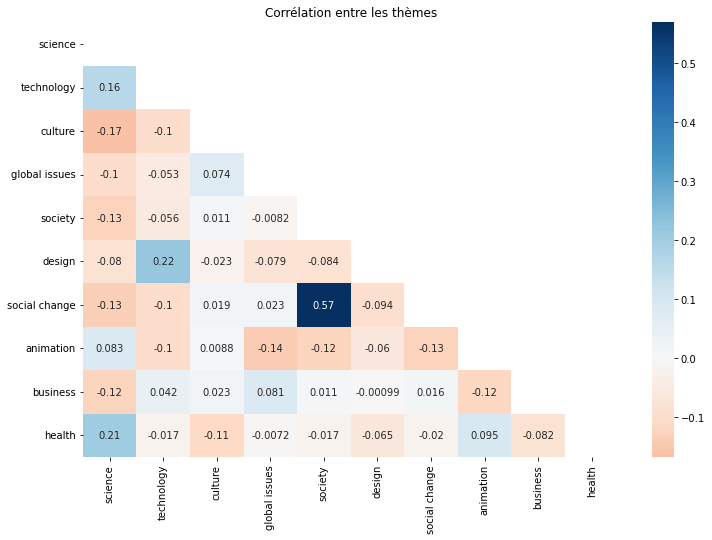

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(one_hot_topics[most_talked].corr(),
            mask=np.tril(np.ones((10,10))).T, cmap="RdBu", center=0, annot=True)
plt.title("Corrélation entre les thèmes")
if save: plt.savefig("../data/graphs/topics_correlation.png")
plt.show()

## Nombres de métiers représentés dans les thèmes les plus populaires

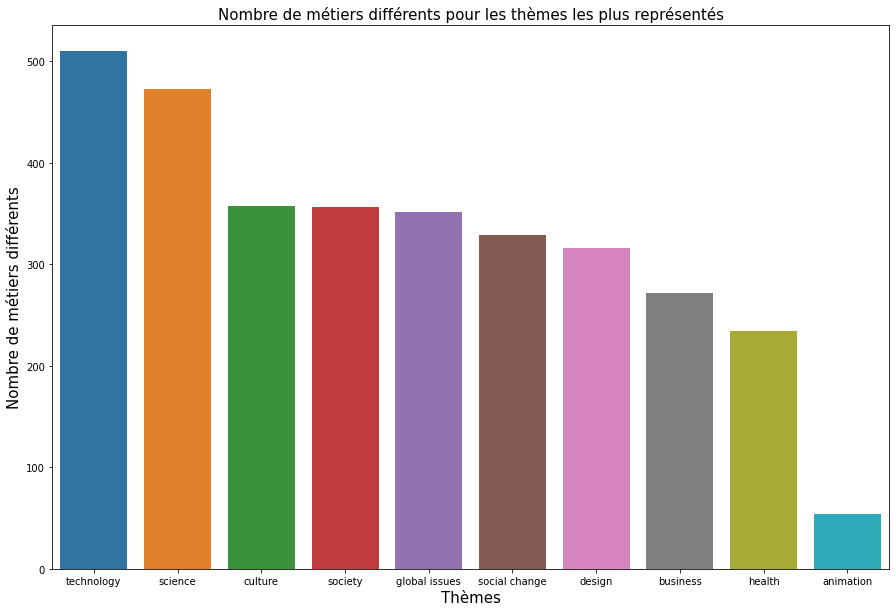

In [34]:
index_popular_topic = top_topics_by_year.columns
index_popular_topic

df_pop_occ = ted_talks[["occupations", "topics"]]

col1 = df_pop_occ.occupations.apply(lambda x : literal_eval(x)[0] if pd.notnull(x) else x ).dropna().explode()

df_pop_occ = df_pop_occ.copy().iloc[col1.index]

df_pop_occ["occ0"] = col1.values

df_pop_occ.drop("occupations", axis = 1, inplace = True)

col2 = df_pop_occ.topics.dropna().explode()

df_pop_occ = df_pop_occ.copy().iloc[col2.index]

df_pop_occ["top"] = col2.values

df_pop_occ.drop("topics", axis = 1, inplace = True)

df_pop_occ.drop_duplicates(inplace = True)

df_pop_occ_counted = df_pop_occ.groupby("top").count().loc[index_popular_topic]

df_pop_occ_counted.sort_values(by = "occ0", ascending = False, inplace = True)

df_pop_occ_counted

plt.figure(figsize=(15, 10))

sns.barplot(x = df_pop_occ_counted.index, y=df_pop_occ_counted.values.reshape(1,-1)[0])
plt.title("Nombre de métiers différents pour les thèmes les plus représentés", fontsize=15)
plt.xlabel("Thèmes", fontsize=15)
plt.ylabel("Nombre de métiers différents", fontsize=15)
plt.show()

## Nombre de pays associes aux évènements

In [35]:
EventCountry = pd.read_csv("../event_country_mapping.csv")
EventCountry.country.value_counts()

USA                     222
Canada                   71
England                  38
Netherlands              11
Germany                  11
Switzerland              10
Australia                 7
India                     6
Belgium                   6
Sweden                    5
Ireland                   4
Spain                     3
Scotland                  3
New Zealand               3
Israel                    3
Kenya                     3
France                    3
China                     3
Italy                     2
Japon                     2
South Africa              2
Norway                    2
Poland                    2
Greece                    2
United States             2
Mexico                    1
Africa                    1
Denmark                   1
Qatar                     1
Georgia                   1
Austria                   1
Galápagos                 1
Livonia                   1
Ghana                     1
Ethiopia                  1
Papua New Guinea    

In [36]:
ted_talks_prepro = pd.read_csv("../data/ted_talks_preprocessed.csv")

ted_talks_prepro.country.value_counts()

Canada                  1864
USA                     1543
England                  124
Scotland                  68
India                     56
Australia                 37
Switzerland               32
Netherlands               23
Germany                   20
Galápagos                 18
China                     18
France                    17
Belgium                   14
Italy                     12
Papua New Guinea           8
Ireland                    7
Norway                     7
Greece                     7
Sweden                     5
Ethiopia                   5
Austrich                   4
Qatar                      4
Spain                      4
Israel                     4
Kenya                      4
Argentina                  4
Japon                      3
Slovakia                   3
Poland                     3
Singapore                  3
Hungary                    3
New Zealand                3
South Africa               2
Africa                     2
Ghana         

In [37]:
neighboor = {}
ted_talks = ted_talks.sort_values(by="talk_id")
for i in range(len(ted_talks)):
    neighboor[ted_talks.talk_id[i]]=(literal_eval(ted_talks.loc[i].related_talks))
neighboor

{1: [243, 547, 2093, 54715, 29968, 2339],
 2: [1561, 1072, 1184, 1406, 767, 285],
 4: [141, 264, 335, 1402, 429, 292],
 7: [1725, 2274, 172, 2664, 2464, 1347],
 10: [263, 348, 248, 377, 24361, 2194],
 16: [307, 374, 1669, 2590, 31375, 2661],
 21: [144, 1282, 1379, 87, 2302, 46600],
 22: [666, 2178, 333, 426, 1245, 11327],
 23: [75, 170, 84, 171, 713, 615],
 25: [1913, 1531, 1570, 37, 1377, 1295],
 34: [2264, 2141, 1789, 1009, 713, 23],
 41: [2043, 255, 1678, 2182, 66, 865],
 45: [2273, 2242, 1156, 1446, 286, 2764],
 48: [90, 2, 266, 1707, 843, 1215],
 49: [750, 2092, 2183, 2220, 2375, 31821],
 53: [1041, 1892, 2078, 2636, 12571, 3581],
 54: [1749, 2183, 31, 6496, 9687, 2532],
 55: [2228, 1476, 800, 2890, 45233, 2694],
 58: [1153, 869, 1905, 62748, 61301, 61303],
 65: [685, 872, 1984, 2410, 1705, 40636],
 66: [865, 1738, 2276, 2182, 2341, 9048],
 68: [163, 42, 341, 801, 1642, 216],
 71: [94, 676, 2011, 86, 9125, 2801],
 86: [22, 94, 856, 71, 2801, 31459],
 90: [2, 48, 288, 1570, 872, 33

In [38]:
for l in neighboor.values():
    if 1783 in l:
        print(l)

[51, 128, 192, 1783, 22628, 2407]
[30303, 23789, 23723, 2412, 39941, 1783]
[2395, 2410, 2571, 1783, 37758, 39941]
[1538, 1851, 2167, 1332, 1783, 2559]
[2875, 1412, 1783, 556, 622, 2127]
[2558, 44494, 2546, 13062, 39941, 1783]


In [39]:
neighboor[243]

[128, 192, 74, 1380, 535, 2784]

In [46]:
distance_metric = {}
for j,l in enumerate(neighboor):
    to_explore = [l]
    distance = {}
    distance[l] = 0
    while to_explore != []:
        e = to_explore.pop()
        if e not in neighboor:
        #print("invalid value ",e)
            continue
        for i in neighboor[e]:
            if i in distance:
                if distance[i] > distance[e]+1:
                    distance[i] = distance[e]+1
            else:
                distance[i] = distance[e]+1
                to_explore.append(i)
    distance_metric[l]=distance
    print(l," ",j)


        

1
2
4
7
10
16
21
22
23
25
34
41
45
48
49
53
54
55
58
65
66
68
71
86
90
92
94
99
108
114
119
123
142
237
334
361
400
405
421
431
439
445
3
6
30
36
37
39
42
43
44
47
63
67
73
74
75
79
91
93
98
164
210
217
247
274
335
420
5
8
9
13
113
116
117
122
167
209
211
215
218
219
221
223
260
267
280
345
426
503
506
510
520
524
533
11
28
32
69
80
102
103
105
109
110
125
126
145
176
278
300
306
318
351
354
355
358
362
364
365
381
394
436
441
447
450
480
515
534
12
18
19
27
31
33
35
38
40
51
56
57
59
60
62
70
89
101
104
112
195
199
216
251
327
347
385
388
390
393
411
428
430
432
738
1150
14
20
29
46
50
64
72
76
77
78
87
97
115
118
121
191
310
312
366
375
377
402
413
422
429
434
442
471
526
562
570
26
61
81
130
82
83
84
85
127
128
129
131
139
140
141
143
144
146
147
148
149
161
162
163
165
170
171
172
178
179
181
182
183
184
187
188
190
194
196
197
200
201
202
203
204
205
206
207
208
212
213
214
222
225
228
239
241
254
259
271
276
285
298
316
333
353
412
529
585
590
835
1176
151
152
153
154
155
156
157

42783
42819
42821
43148
43226
43862
44216
44345
44494
44879
45086
45088
45172
45537
45538
45539
45868
46517
46518
46519
46529
46530
46581
46590
46591
46592
46593
46601
48221
48222
48268
48272
48275
48856
49129
49130
49223
49279
49429
49439
49446
49779
49931
50641
50755
50803
50986
50987
51332
51605
51845
51990
52017
52194
52195
52402
52462
52811
52812
52813
53276
53523
53667
53671
54352
54513
54653
54827
55042
55140
55275
55593
55793
55981
56535
56811
57059
57311
57639
57701
57706
58017
58119
58120
58212
58601
58787
59145
59148
59149
59150
59154
59156
59158
60063
60079
60411
60487
60819
60926
61119
61316
61317
61575
61579
61611
61644
61992
62062
62214
62270
62306
62347
62406
62554
62707
62782
62784
62794
1392
1427
1607
2210
2403
2655
2818
2824
26918
27155
31376
1393
1673
1399
1406
25727
1407
2369
2620
9126
39220
44373
1431
1437
2610
36384
1441
1452
1480
1507
1779
1453
1455
1457
1461
1462
1467
1483
1484
1490
1499
1516
1629
1660
1459
2709
12385
49002
1463
1465
1466
1468
1475
1481
1485
15

12354
12727
12800
13029
13828
13834
15536
15814
20172
20173
3891
4539
6234
9048
10173
12459
13517
21017
21307
23174
25572
27173
27608
29391
30296
44339
44829
49046
50957
53602
53740
54358
55993
4856
5351
5655
6235
7394
9985
10193
10750
6286
8780
9214
9219
9986
11008
12501
13217
13464
15862
10358
59779
10361
10666
11871
12302
13247
13720
13878
15289
15290
19535
20519
20692
11363
12066
12346
12347
12348
12349
12350
12351
12352
12353
57913
57914
57915
57916
57917
57918
57920
58706
12650
13009
13010
13011
13012
13013
13586
13588
13589
13923
14392
14439
14471
14484
14485
14486
14491
14608
14610
14613
14614
14615
15149
15214
15274
15275
15471
15518
15531
15537
15553
15555
15722
15813
16159
16294
16913
17237
17238
17239
17275
17603
17733
17846
17851
17922
18094
18219
18394
18469
18517
18592
18928
19322
19330
19413
19461
19478
19740
19756
19851
19927
19992
20082
20083
20085
20089
20101
20259
20269
20310
20368
20390
20447
20475
20554
20633
20753
20757
20779
20975
21117
21584
21646
21803
21804
2

(array([   4,    8, 3740, 3741, 3742, 3743, 3744, 3745]),
 array([   1,    8, 3654,  222,   43,    9,    2,    6]))

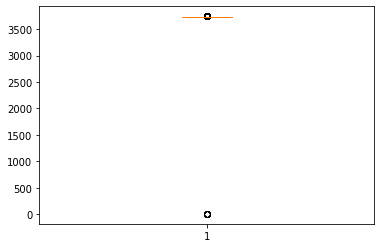

In [75]:
length = np.array([len(distance_metric[l]) for l in neighboor])
plt.boxplot(length)
np.unique(length, return_counts=True)

In [62]:
distance_metric[547]

{547: 0,
 128: 1,
 104: 1,
 535: 1,
 1850: 1,
 1927: 1,
 1837: 1,
 1836: 2,
 1153: 2,
 1656: 2,
 8866: 2,
 585: 2,
 157: 3,
 152: 3,
 983: 3,
 1076: 3,
 208: 4,
 644: 4,
 842: 4,
 555: 4,
 11685: 4,
 2732: 5,
 2311: 5,
 4755: 5,
 31700: 5,
 37787: 5,
 55113: 5,
 54214: 6,
 2629: 6,
 1031: 6,
 30301: 6,
 1906: 6,
 1040: 6,
 1672: 7,
 1030: 7,
 2394: 7,
 2547: 7,
 1943: 8,
 1069: 8,
 2262: 8,
 2628: 6,
 2578: 9,
 2621: 9,
 2448: 6,
 2327: 9,
 1812: 10,
 2293: 6,
 1403: 8,
 140: 11,
 1753: 6,
 3591: 7,
 1654: 12,
 217: 12,
 2329: 6,
 2229: 13,
 52073: 13,
 50930: 14,
 33778: 14,
 3585: 3,
 1930: 15,
 2601: 15,
 37800: 15,
 2210: 15,
 25572: 15,
 21802: 16,
 2724: 16,
 49359: 16,
 2283: 3,
 25601: 16,
 3114: 17,
 25595: 17,
 38268: 17,
 17922: 18,
 1355: 18,
 38078: 18,
 2646: 19,
 13828: 17,
 2151: 7,
 2634: 17,
 1378: 7,
 2240: 20,
 41678: 7,
 19413: 21,
 14491: 6,
 31780: 7,
 34302: 20,
 20973: 22,
 23780: 22,
 2691: 17,
 2453: 23,
 50857: 23,
 46074: 24,
 35566: 24,
 2826: 24,
 2532: 2